# Econophysics I
## Exercise 04 - H08

### Juan Camilo Henao Londono
### Universität Duisburg-Essen
12.05.2020

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt

## Exercise 04. Homework 08. Point 03

With the choice $A\left(S,t\right) = B\left(S,t\right) = S$ we obtain the geometric Brownian motion. Create random paths for the geometric Brownian motion by using It\^{o}'s lemma. Choose $\mu = \frac{0.08}{a}$, where a trading year $a$ consists of $250$ trading days $d$, $a = 250 d$. Determine at least five trajectories over $20$ years with $\sigma = \frac{0.02}{\sqrt{d}}$ and draw them with the computer. Determine at least five trajectories with the smaller volatility $\sigma = \frac{0.005}{\sqrt{d}}$ of an equity fund and present them in a separate figures.

In [2]:
def geometric_brownian_motion(t0, t, s0, mu, sigma, N):
    
    delta_t = (t - t0) / N
    epsilon = np.random.normal(size=N) 
    mu_eff = mu - ((sigma ** 2) / 2)
    
    delta_f = mu_eff * delta_t * np.ones(N) + sigma * epsilon * delta_t ** .5
    
    t_vec = np.append(t0, t0 + np.cumsum(delta_t * np.ones(N)))
    f_vec = np.append(s0, s0 * np.exp(np.cumsum(delta_f)))
    
    return (t_vec , f_vec)

In [3]:
# Initial values

t0 = 0 # years
s0 = 1 # currency
days = 250 # days
t = 20 # years
mu = 0.08
sigma_1 = 0.02 * days ** .5
sigma_2 = 0.005 * days ** .5
N = 1000

simulations = 6

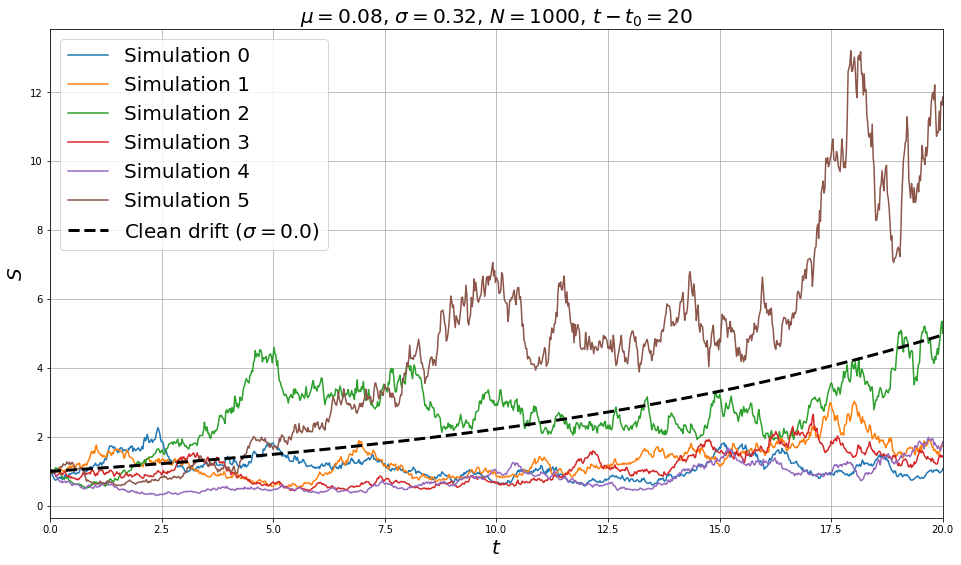

In [4]:
# Figure
fig = plt.figure(figsize=(16,9))

for sim in range(simulations):
    
    (t_vec, s_vec) = geometric_brownian_motion(t0, t, s0, mu, sigma_1, N)
    plt.plot(t_vec, s_vec, label='Simulation {}'.format(sim))
    
# clean drift (sigma = 0)
(t_vec, s_vec) = geometric_brownian_motion(t0, t, s0, mu, 0 * sigma_1, N)
plt.plot(t_vec, s_vec, '--k', linewidth = 3, label='Clean drift ($\sigma = {}$)'.format(0 * sigma_1))

plt.xlabel("$t$", fontsize=20)
plt.ylabel('$S$', fontsize=20)
plt.title(r"$\mu={:.2f}$, $\sigma={:.2f}$, $N={}$, $t - t_0 = {}$".format(mu, sigma_1, N, t - t0), fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(min(t_vec), max(t_vec))
plt.grid(True)

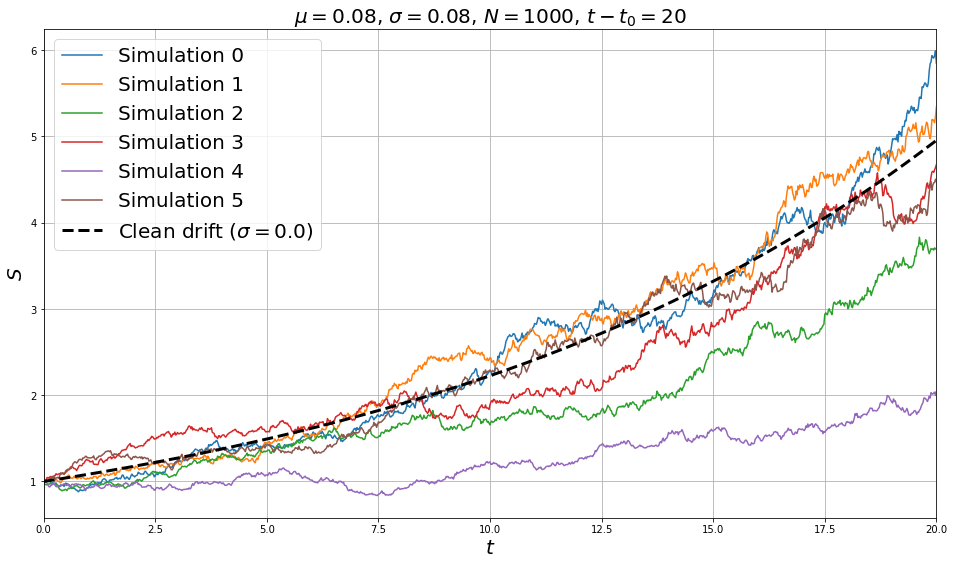

In [5]:
# Figure
fig = plt.figure(figsize=(16,9))

for sim in range(simulations):
    
    (t_vec, s_vec) = geometric_brownian_motion(t0, t, s0, mu, sigma_2, N)
    plt.plot(t_vec, s_vec, label=f'Simulation {sim}')
    
# clean drift (sigma = 0)
(t_vec, s_vec) = geometric_brownian_motion(t0, t, s0, mu, 0 * sigma_2, N)
plt.plot(t_vec, s_vec, '--k', linewidth = 3, label='Clean drift ($\sigma = {}$)'.format(0 * sigma_2))

plt.xlabel("$t$", fontsize=20)
plt.ylabel('$S$', fontsize=20)
plt.title(r"$\mu={:.2f}$, $\sigma={:.2f}$, $N={}$, $t - t_0 = {}$".format(mu, sigma_2, N, t-t0), fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(min(t_vec), max(t_vec))
plt.grid(True)